In [1]:
import os
import sys
import glob
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import pprint
import shutil
from ResoFit._utilities import Layer
from ResoFit.calibration import Calibration
from ResoFit.fitresonance import FitResonance

In [2]:
# Global parameters
energy_min = 7
energy_max = 250
energy_step = 0.01

In [3]:
# Input sample name or names as str, case sensitive
layer_1 = 'U'
thickness_1 = 0.085
density_1 = None
layer_2 = 'Gd'
thickness_2 = 0.085
density_2 = None
layer = Layer()
layer.add_layer(layer=layer_1, thickness_mm=thickness_1, density_gcm3=density_1)
layer.add_layer(layer=layer_2, thickness_mm=thickness_2, density_gcm3=density_2)

In [4]:
folder = 'data/IPTS_19558/reso_data_19558'
data_file = 'spheres.csv'
spectra_file = 'Image002_Spectra.txt'
image_start = None  # Can be omitted or =None
image_end = None  # Can be omitted or =None
norm_to_file = None  # 'sphere_background_1.csv'
baseline = True
each_step = False
before = False
table = True
grid = True
peak = 'indexed'
items_to_plot = None

repeat = 1
source_to_detector_m = 16.  # 16#16.445359069030175#16.447496101100739
offset_us = 0  # 0#2.7120797253959119#2.7355447625559037

In [10]:
# Calibrate source_to_detector and/or delay
calibration = Calibration(data_file=data_file,
                          spectra_file=spectra_file,
                          layer=layer,
                          energy_min=energy_min,
                          energy_max=energy_max,
                          energy_step=energy_step,
                          folder=folder,
                          baseline=baseline)

calibration.experiment.norm_to(norm_to_file)
calibration.experiment.slice(start=300, end=image_end)

calibrate_result = calibration.calibrate(source_to_detector_m=source_to_detector_m,
                                         offset_us=offset_us,
                                         vary='all',
                                         each_step=each_step)
# calibration.find_peak()
calibration.index_peak(thres=0.13, min_dist=21)

+----------------- Calibration -----------------+
Params before:
Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
offset_us                    0     -inf      inf     None     True     None     None
source_to_detector_m        16     -inf      inf     None     True     None     None

Params after:
Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
offset_us                2.705     -inf      inf  0.02859     True     None     None
source_to_detector_m     16.43     -inf      inf 0.003151     True     None     None
Calibration chi^2 : 159.5384091064498



/Users/Shawn/anaconda3/envs/py36/lib/python3.6/site-packages/peakutils/peak.py:221: UserWarning:

At least 3 points required for Gaussian fitting



{'230-U': {'exp': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: [], 'ideal': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: []}, '231-U': {'exp': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: [], 'ideal': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: []}, '232-U': {'exp': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: [], 'ideal': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: []}, '233-U': {'exp': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: [], 'ideal': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: []}, '234-U': {'exp': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: [], 'ideal': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: []}, '235-U': {'exp':             x         y  x_num  x_num_o       x_s       x_A
  0  208.734373  0.030893    191      491  0.000080  0.01

In [11]:
calibration.analyze_peak()

/Users/Shawn/anaconda3/envs/py36/lib/python3.6/site-packages/lmfit/models.py:30: FutureWarning:


The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.



230-U
231-U
232-U
233-U
234-U
235-U
236-U
237-U
238-U
239-U
240-U
241-U
U
152-Gd
153-Gd
154-Gd
155-Gd
156-Gd
157-Gd
158-Gd
160-Gd
Gd
+------------ Peak analysis ------------+
Lorentzian peak fitting:
  ele_name   center_val   fwhm_val
0       Gd   200.438720  61.623589
1        U   200.555419  61.626143
2        U   206.001475   2.619626
3        U   371.404339  44.410071
4        U   417.551973  29.919237
5        U   583.616512  18.535030
6        U   912.901433  17.064536
7       Gd  1237.000000  99.977987
8        U  1308.342215   6.558220
9       Gd  1500.999999  16.095270



{'230-U': {'exp': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: [], 'ideal': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: [], 'peak_span': Empty DataFrame
  Columns: [img_num, time_s, energy_ev, y]
  Index: []}, '231-U': {'exp': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: [], 'ideal': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: [], 'peak_span': Empty DataFrame
  Columns: [img_num, time_s, energy_ev, y]
  Index: []}, '232-U': {'exp': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: [], 'ideal': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: [], 'peak_span': Empty DataFrame
  Columns: [img_num, time_s, energy_ev, y]
  Index: []}, '233-U': {'exp': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: [], 'ideal': Empty DataFrame
  Columns: [x, y, x_num, x_num_o, x_s, x_A]
  Index: [], 'peak_span': Empty DataFrame
  Columns: [img_num, tim

/Users/Shawn/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning:

tight_layout cannot make axes width small enough to accommodate all axes decorations

/Users/Shawn/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning:

tight_layout cannot make axes height small enough to accommodate all axes decorations



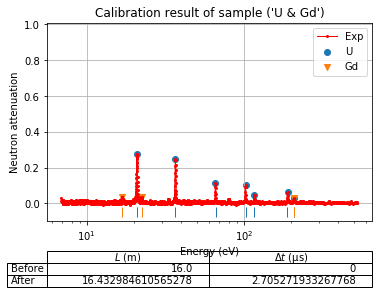

In [23]:
calibration.plot(before=before,
                 table=table,
                 peak_exp=peak,
                 grid=grid,
                 index_level='ele',
                 peak_height=False,
                 interp=False,)

In [17]:
calibration.experiment.o_peak.peak_map_indexed[layer_1]['peak_span']

,img_num,time_s,energy_ev,y
0,469,NaN,NaN,0.012684
1,470,NaN,NaN,0.004289
2,471,NaN,NaN,0.001291
3,472,NaN,NaN,0.008873
4,473,NaN,NaN,0.006188
5,474,NaN,NaN,0.005130
6,475,NaN,NaN,0.010383
7,476,NaN,NaN,0.009706
8,477,NaN,NaN,0.003763
9,478,NaN,NaN,0.003917


In [18]:
calibration.experiment.o_peak.peak_map_indexed[layer_2]['peak_span']

,img_num,time_s,energy_ev,y
0,469,NaN,NaN,0.012684
1,470,NaN,NaN,0.004289
2,471,NaN,NaN,0.001291
3,472,NaN,NaN,0.008873
4,473,NaN,NaN,0.006188
5,474,NaN,NaN,0.005130
6,475,NaN,NaN,0.010383
7,476,NaN,NaN,0.009706
8,477,NaN,NaN,0.003763
9,478,NaN,NaN,0.003917


In [19]:
def fill_zeros_to_num_str(num_str, tot_digits=5):
    while len(num_str)<tot_digits:
        num_str = '0' + num_str
    return num_str

In [24]:
# fill '0' to match digits of nume surffix
peak_map_indexed = calibration.experiment.o_peak.peak_map_indexed
img_num_str_dict = {}
for each_ele in peak_map_indexed.keys():
    img_num_str_dict[each_ele] = {}
    img_num = list(peak_map_indexed[each_ele]['peak_span']['img_num'])
    img_num_str_dict[each_ele]['num'] = [fill_zeros_to_num_str(num_str) for num_str in list(map(str, img_num))]
    img_num_str_dict[each_ele]['len'] = len(img_num_str_dict[each_ele]['num'])
pprint.pprint(img_num_str_dict)
    

{'152-Gd': {'len': 0, 'num': []},
 '153-Gd': {'len': 0, 'num': []},
 '154-Gd': {'len': 0, 'num': []},
 '155-Gd': {'len': 0, 'num': []},
 '156-Gd': {'len': 0, 'num': []},
 '157-Gd': {'len': 0, 'num': []},
 '158-Gd': {'len': 0, 'num': []},
 '160-Gd': {'len': 0, 'num': []},
 '230-U': {'len': 0, 'num': []},
 '231-U': {'len': 0, 'num': []},
 '232-U': {'len': 0, 'num': []},
 '233-U': {'len': 0, 'num': []},
 '234-U': {'len': 0, 'num': []},
 '235-U': {'len': 0, 'num': []},
 '236-U': {'len': 0, 'num': []},
 '237-U': {'len': 0, 'num': []},
 '238-U': {'len': 0, 'num': []},
 '239-U': {'len': 0, 'num': []},
 '240-U': {'len': 0, 'num': []},
 '241-U': {'len': 0, 'num': []},
 'Gd': {'len': 184,
        'num': ['00469',
                '00470',
                '00471',
                '00472',
                '00473',
                '00474',
                '00475',
                '00476',
                '00477',
                '00478',
                '00479',
                '00480',
            

In [11]:
# fill '0' to match digits of nume surffix
peak_map_indexed = calibration.experiment.o_peak.peak_map_indexed
img_num_str_dict = {}
for each_ele in peak_map_indexed.keys():
    img_num_str_dict[each_ele] = {}
    img_num = list(peak_map_indexed[each_ele]['peak_span']['img_num'])
    img_num_str_dict[each_ele]['num'] = [fill_zeros_to_num_str(num_str) for num_str in list(map(str, img_num))]
    img_num_str_dict[each_ele]['len'] = len(img_num_str_dict[each_ele]['num'])
pprint.pprint(img_num_str_dict)
    

{'Gd': {'len': 32,
        'num': ['00489',
                '00490',
                '00491',
                '00492',
                '00493',
                '00494',
                '01545',
                '01546',
                '01547',
                '01548',
                '01549',
                '01550',
                '01551',
                '01552',
                '01553',
                '01554',
                '01782',
                '01783',
                '01784',
                '01785',
                '01786',
                '01787',
                '01788',
                '01789',
                '01790',
                '01791',
                '01792',
                '01793',
                '01794',
                '01795',
                '01796',
                '01797']},
 'U': {'len': 46,
       'num': ['00514',
               '00515',
               '00516',
               '00517',
               '00518',
               '00661',
               '0

In [12]:
_list_files = glob.glob('/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/*.fits')

In [13]:
_list_files

['/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00000.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00001.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00002.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00003.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00004.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00005.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00006.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00007.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00008

In [14]:
# find full name with img_num
loc_dict = {}
for ele in img_num_str_dict.keys():
    loc_dict[ele] = []
for _names in _list_files:
    _base_name = _names.split('.')[0]
    for _ele in img_num_str_dict.keys():
        if _base_name[-5:] in img_num_str_dict[_ele]['num']:
            loc_dict[_ele].append(_names)

In [16]:
out_main_dir = '/Users/y9z/Downloads/test/'

for ele in img_num_str_dict.keys():
    out_ele_dir = out_main_dir + ele
    if os.path.exists(out_ele_dir) is False:
        os.makedirs(out_ele_dir)
    img_num_str_dict[ele]['dir'] = out_ele_dir

assert os.path.isdir(out_main_dir)

In [17]:
pprint.pprint(img_num_str_dict)

{'Gd': {'dir': '/Users/y9z/Downloads/test/Gd',
        'len': 32,
        'num': ['00489',
                '00490',
                '00491',
                '00492',
                '00493',
                '00494',
                '01545',
                '01546',
                '01547',
                '01548',
                '01549',
                '01550',
                '01551',
                '01552',
                '01553',
                '01554',
                '01782',
                '01783',
                '01784',
                '01785',
                '01786',
                '01787',
                '01788',
                '01789',
                '01790',
                '01791',
                '01792',
                '01793',
                '01794',
                '01795',
                '01796',
                '01797']},
 'U': {'dir': '/Users/y9z/Downloads/test/U',
       'len': 46,
       'num': ['00514',
               '00515',
               '00516

In [49]:
for ele in img_num_str_dict.keys():
    for each in loc_dict[ele]:
        shutil.copy(src=each, dst=img_num_str_dict[ele]['dir'])